# Explore here

In [7]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

# Leer el archivo CSV
df = pd.read_csv(url, sep=';') # Este archivo CSV contiene punto y coma como separadores
print(df.head())
print(df.columns)
df.head()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float

In [9]:
print(f"Valores unicos por columna: \n{df.nunique()}")

Valores unicos por columna: 
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


### Eliminamos columnas que no nos aporten datos relevantes

In [10]:
print("No hay posibles datos duplicados que representen un problema en el analisis")

#Eliminamos datos irrelevantes
total_dataf = df.drop(['duration', 'emp.var.rate', 'nr.employed'], axis=1, inplace=False)
print(total_dataf.shape)
print(total_dataf.columns)
total_dataf.head()

No hay posibles datos duplicados que representen un problema en el analisis
(41188, 18)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


## Análisis de variables univariante

### Generamos gráficos con los valores categóricos con posibles outlayers

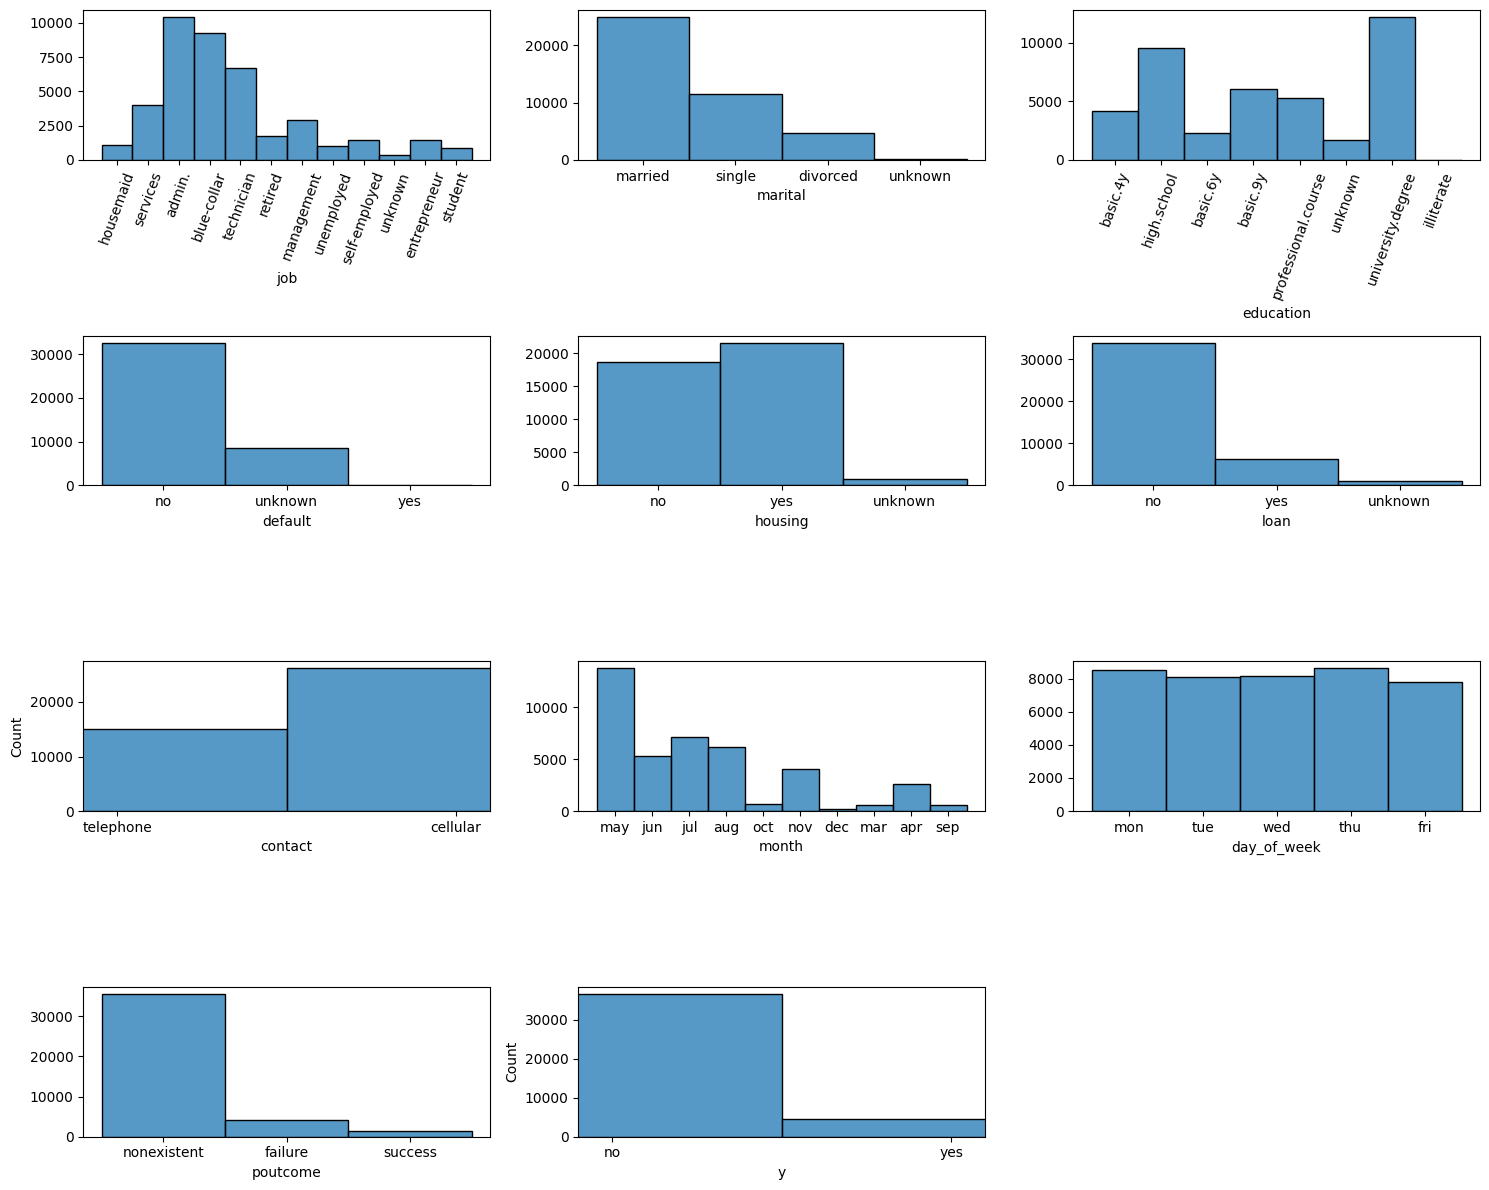

In [11]:
fig, axis = plt.subplots(4, 3, figsize = (15, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "job").set(ylabel = None)
axis[0,0].tick_params(axis="x", rotation=70)

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "marital").set(ylabel = None)
plt.xticks(rotation=45)
sns.histplot(ax = axis[0, 2], data = total_dataf, x = "education").set(ylabel = None)
axis[0,2].tick_params(axis="x", rotation=70)

sns.histplot(ax = axis[1, 0], data = total_dataf, x = "default").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = total_dataf, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_dataf, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = total_dataf, x = "contact").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[2, 1], data = total_dataf, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = total_dataf, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = total_dataf, x = "poutcome").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = total_dataf, x = "y").set_xlim(-0.1, 1.1)

fig.delaxes(axis[3, 2])


'''job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)'''

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Generamos gráficos con los valores numéricos con posibles outlayers

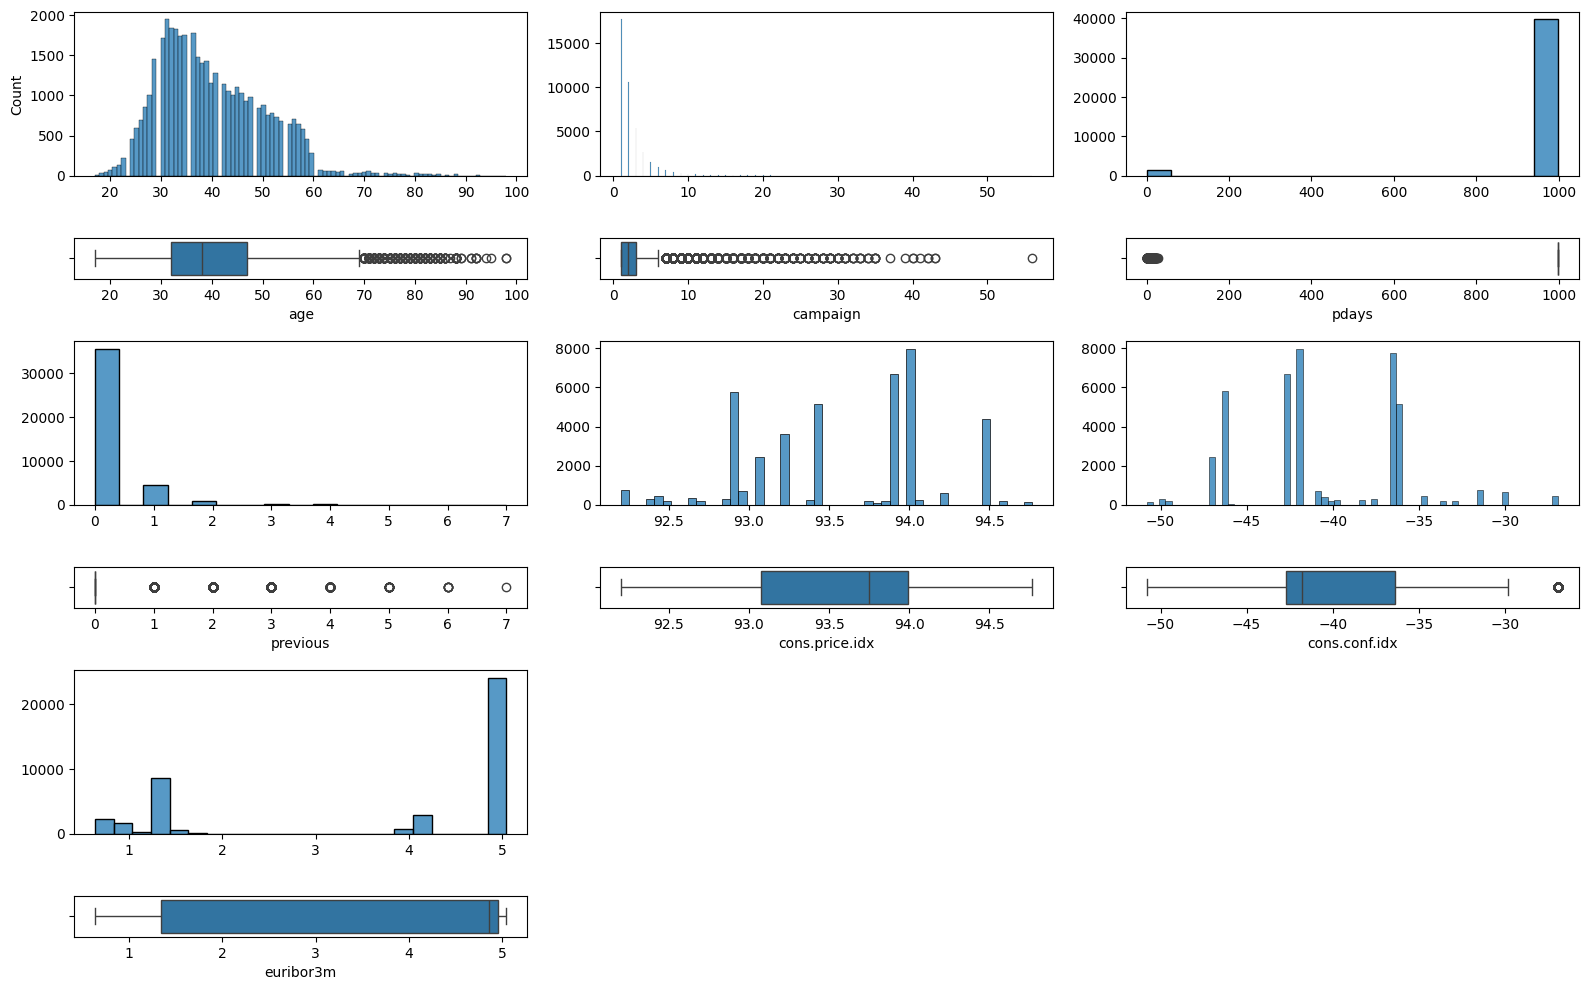

In [12]:
'''age. Edad del cliente (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)'''

fig, axis = plt.subplots(6, 3, figsize = (16, 10), gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "age")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "campaign")

sns.histplot(ax = axis[0, 2], data = total_dataf, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_dataf, x = "pdays")


sns.histplot(ax = axis[2, 0], data = total_dataf, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "previous")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "cons.price.idx")

sns.histplot(ax = axis[2, 2], data = total_dataf, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_dataf, x = "cons.conf.idx")


sns.histplot(ax = axis[4, 0], data = total_dataf, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = total_dataf, x = "euribor3m")

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])

fig.delaxes(axis[4, 2])
fig.delaxes(axis[5, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos "y" como variable objetivo y será factorizada para poder relacionarla con las variable numéricas

### "y" - (age, campaign, pdays, previous, cons.price.idx, cons.conf.idx, euribor3m)

In [13]:
#En este caso, la variable objetivo se puede factorizar para realizar un analisis numerico como se demuestra a continuación
total_dataf["y_n"] = pd.factorize(total_dataf.y)[0]

y_transformation_rules = {row["y"]: row["y_n"] for index, row in total_dataf[["y_n", "y"]].drop_duplicates().iterrows()}

#Guardamos la regla de transformacion en data/processed
with open("../data/processed/y_transformation_rules.json", "w") as f:
  json.dump(y_transformation_rules, f)

total_dataf[["y","y_n"]].head()

,y,y_n
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


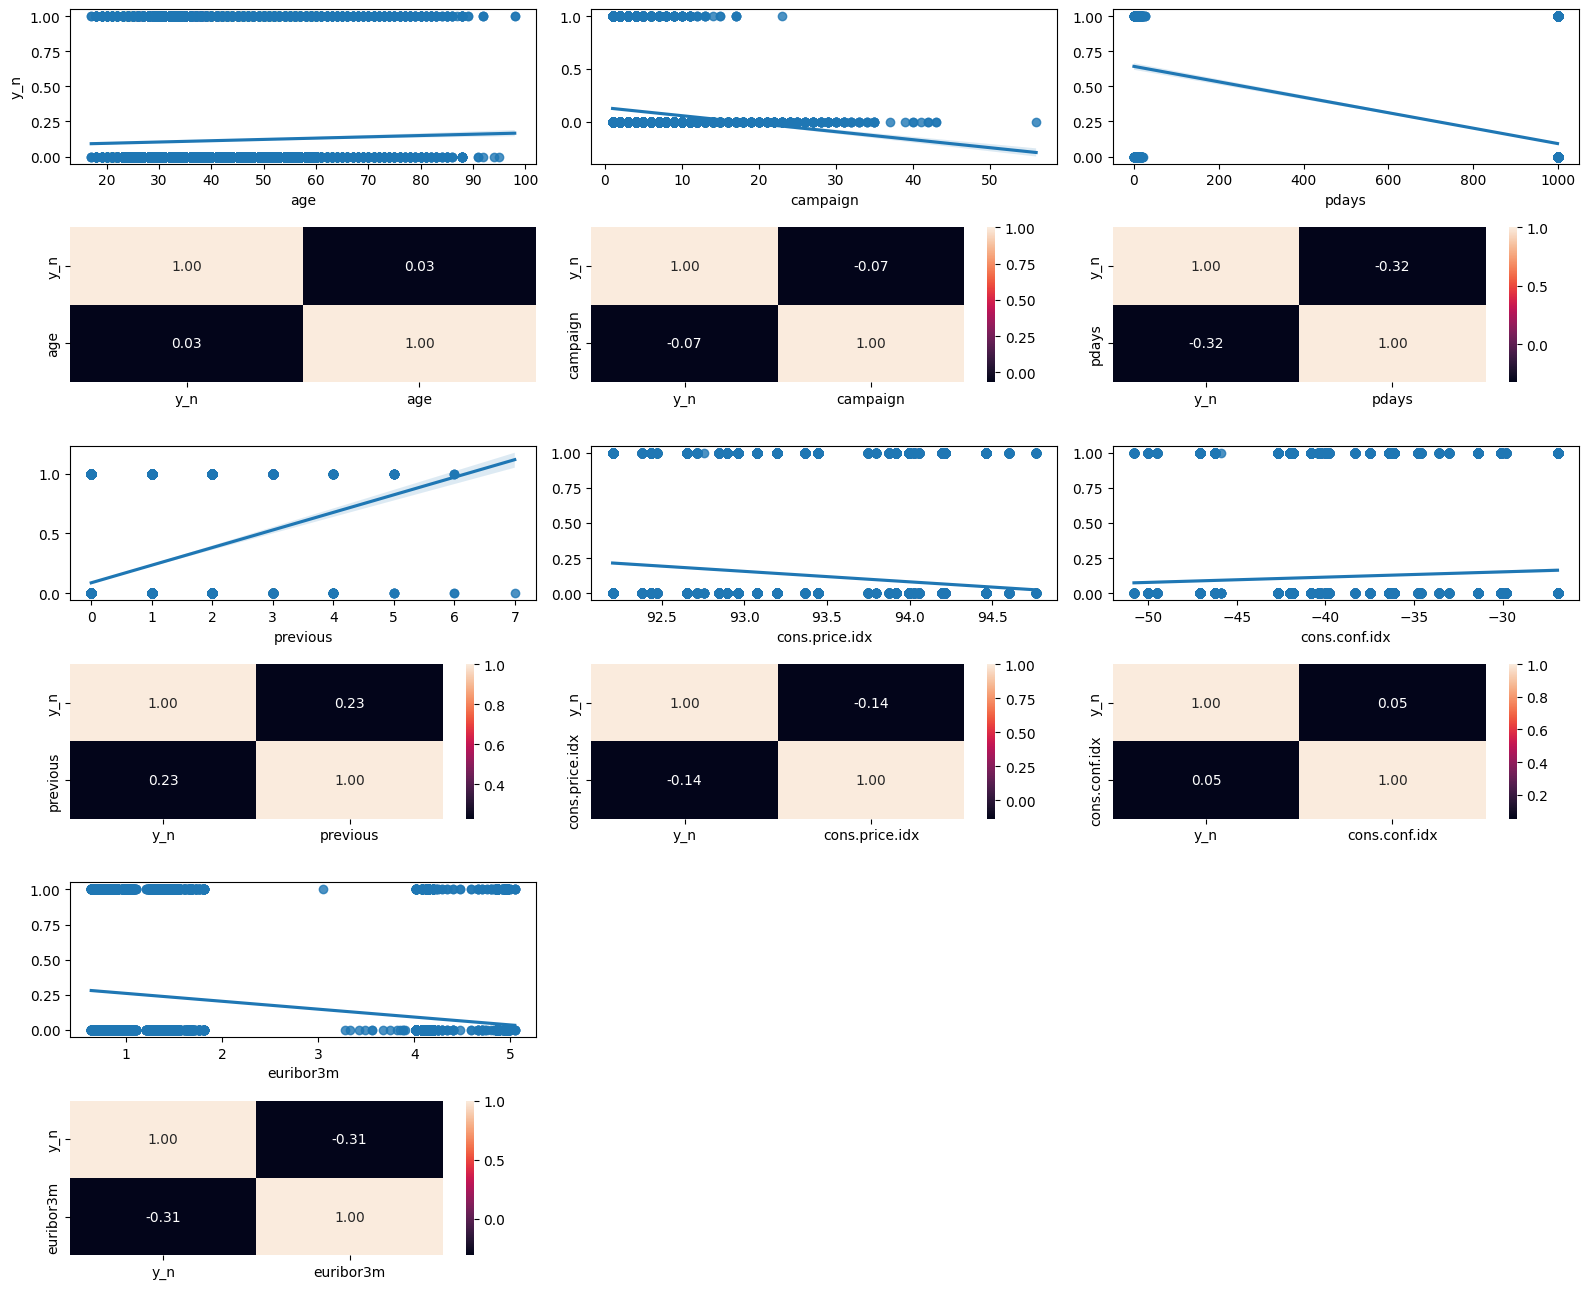

In [14]:
fig, axis = plt.subplots(6, 3, figsize = (16, 13))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "age", y = "y_n")
sns.heatmap(total_dataf[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "campaign", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "pdays", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])



sns.regplot(ax = axis[2, 0], data = total_dataf, x = "previous", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "cons.price.idx", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 2], data = total_dataf, x = "cons.conf.idx", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])



sns.regplot(ax = axis[4, 0], data = total_dataf, x = "euribor3m", y = "y_n").set(ylabel=None)
sns.heatmap(total_dataf[["y_n", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])
fig.delaxes(axis[4, 2])
fig.delaxes(axis[5, 2])

# Ajustar el layout
plt.tight_layout()


'''age. Edad del cliente (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico) aumento de coste de la vida 
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) opinion situacioin fininanciera del pais
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)'''

# Mostrar el plot
plt.show()

### Combinaciones entre variables numéricas

Vamos a explorar la relación entre: age-campaign, age-previous, campaign-previous, campaign-euribor3m

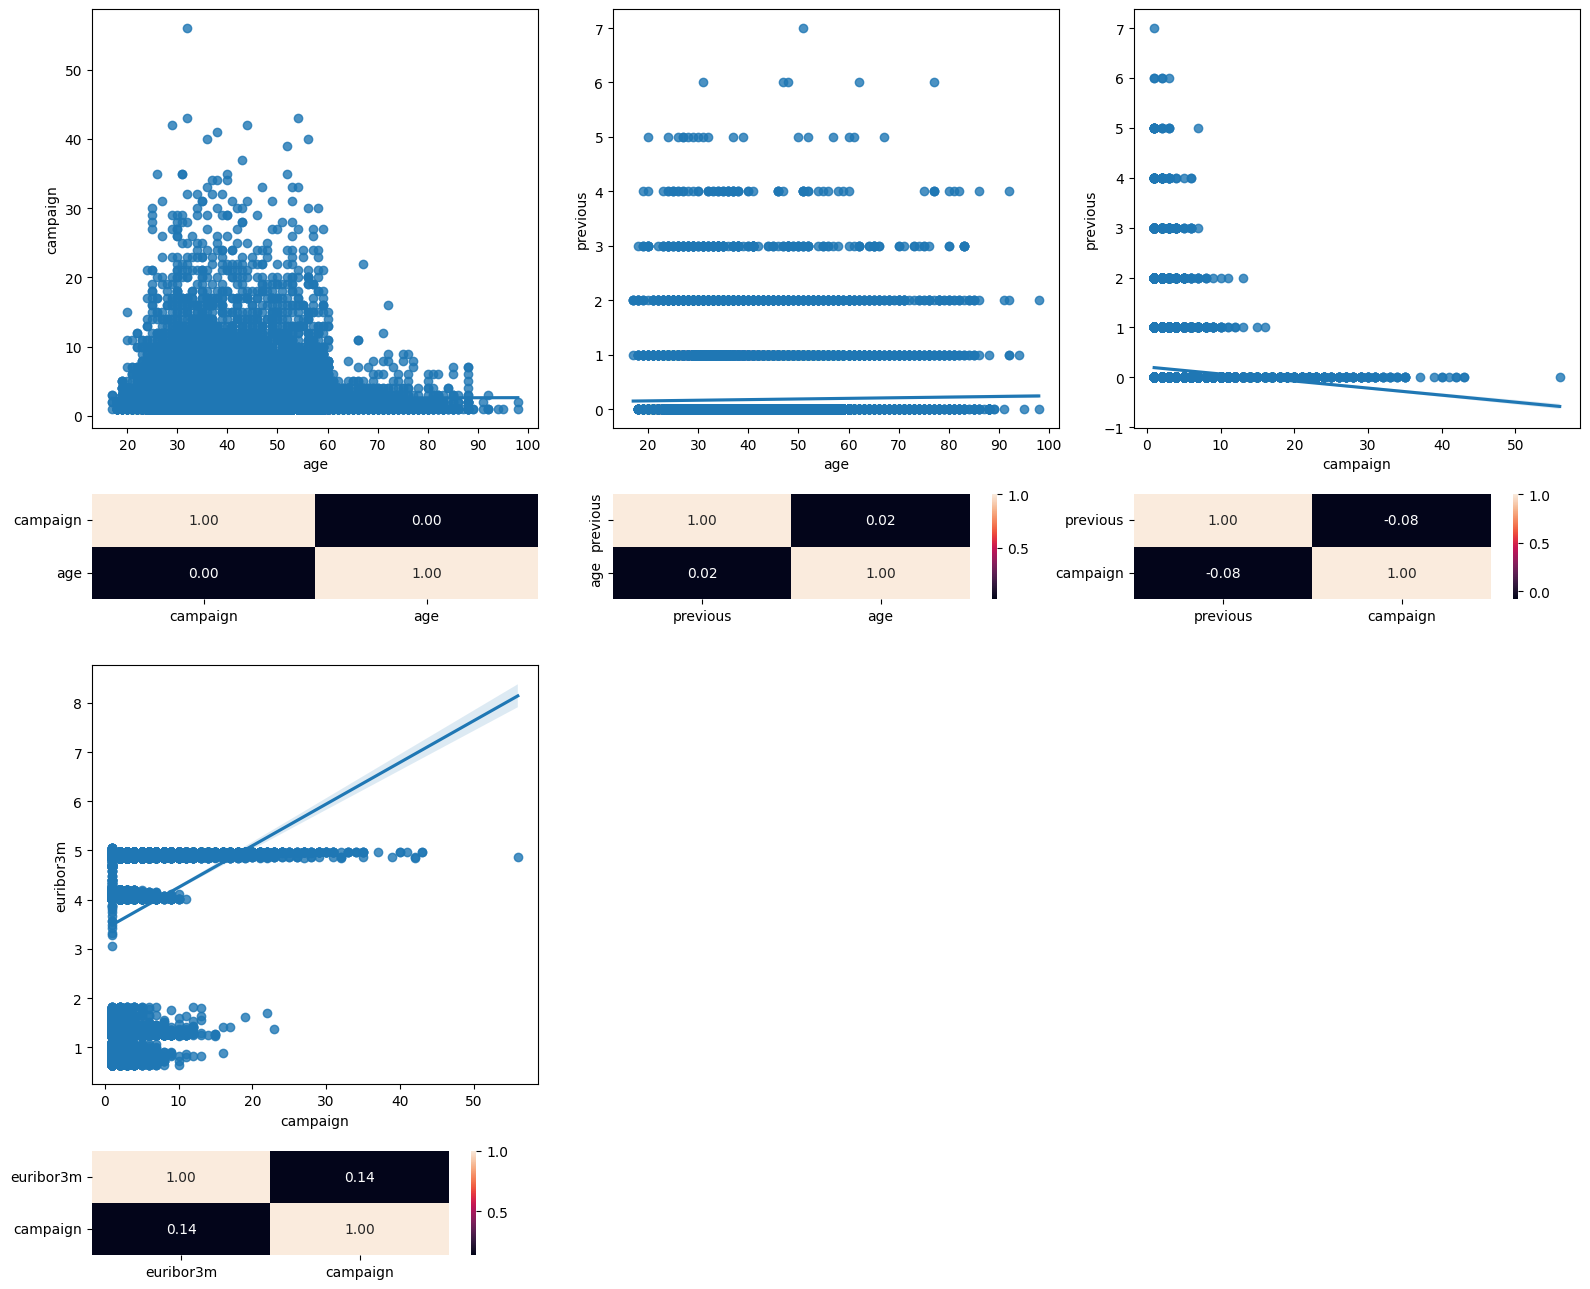

In [26]:
fig, axis = plt.subplots(4, 3, figsize = (16, 13), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "age", y = "campaign")
sns.heatmap(total_dataf[["campaign", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "age", y = "previous")
sns.heatmap(total_dataf[["previous", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "campaign", y = "previous")
sns.heatmap(total_dataf[["previous", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[2, 0], data = total_dataf, x = "campaign", y = "euribor3m")
sns.heatmap(total_dataf[["euribor3m", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()


### Combinaciones post-mapa de calor

In [16]:
#conspriceidx consconfindx y - euribor conficons y

### Análisis categórico-categórico

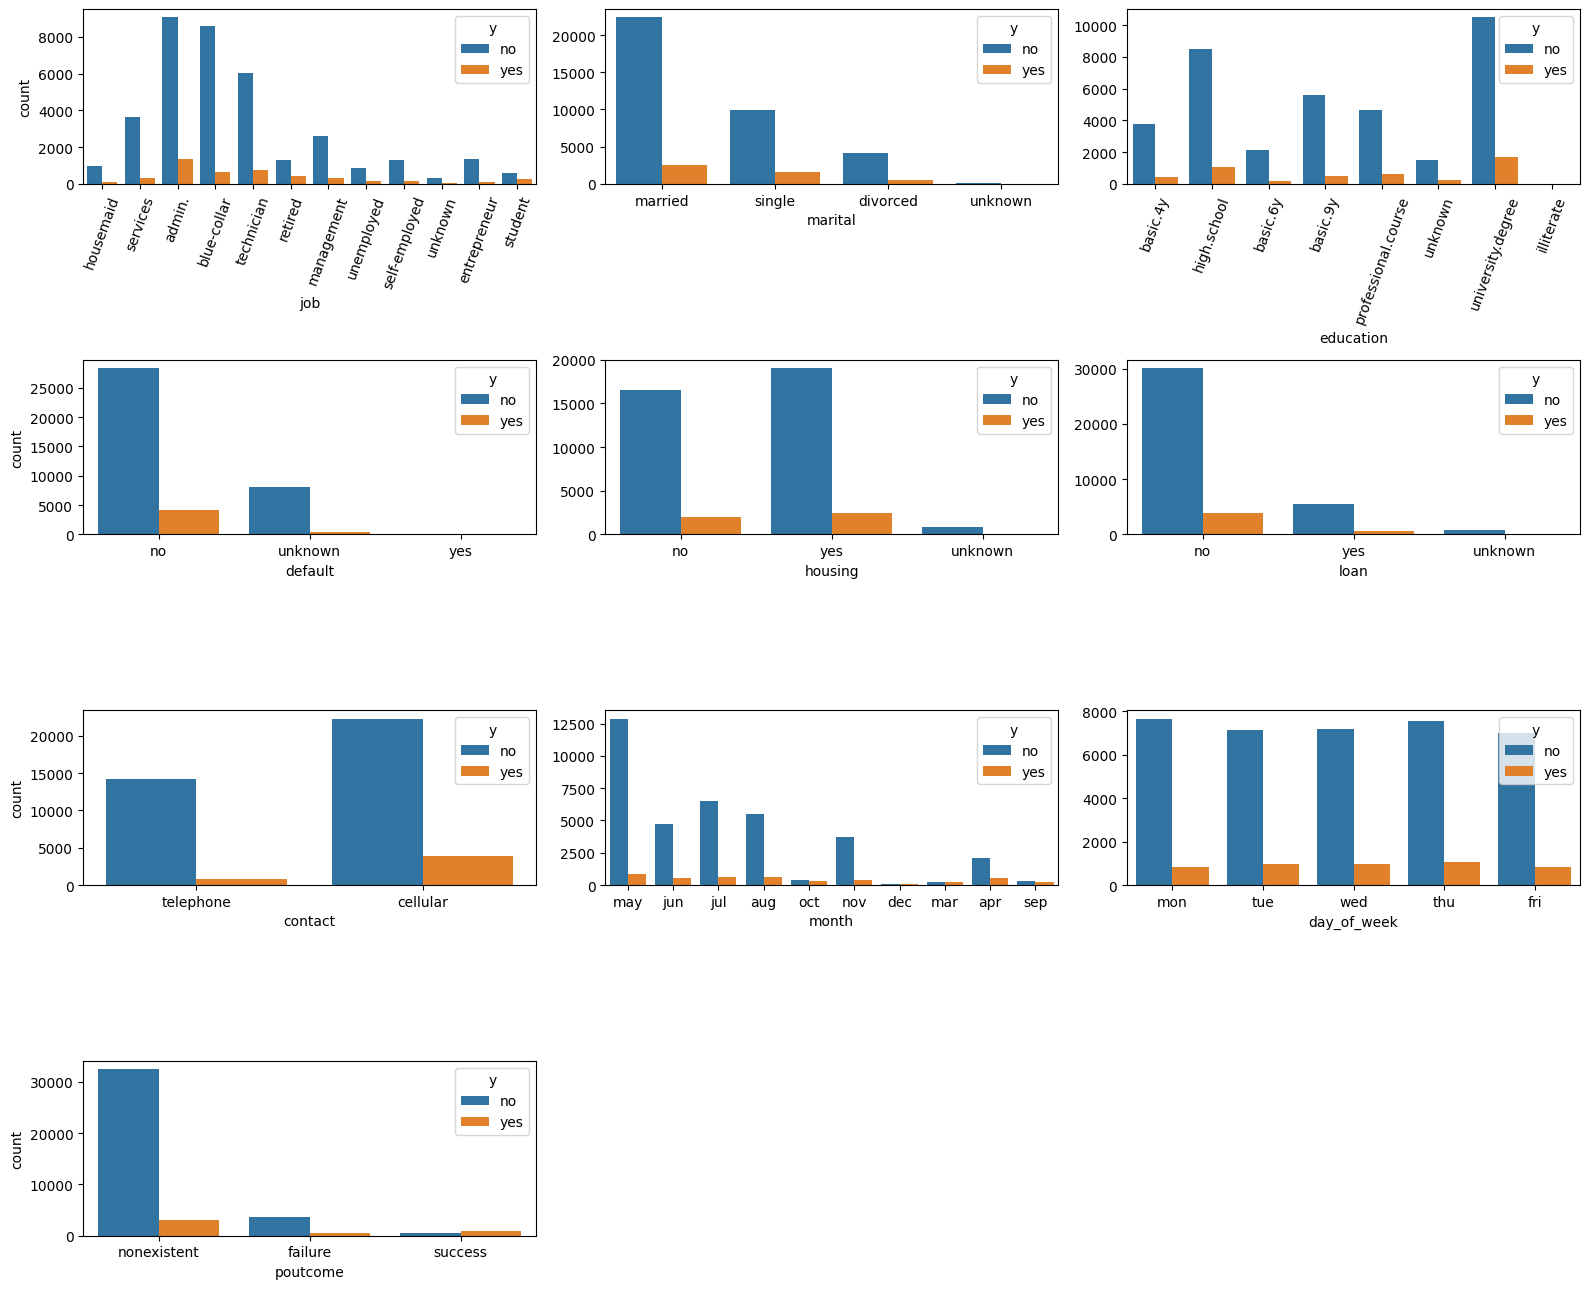

In [17]:
fig, axis = plt.subplots(4, 3, figsize = (16, 13))

# Crear un diagrama de dispersión múltiple
sns.countplot(ax = axis[0, 0], data = total_dataf, x = "job", hue = "y")
axis[0,0].tick_params(axis="x", rotation=70)
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_dataf, x = "education", hue = "y").set(ylabel = None)
axis[0,2].tick_params(axis="x", rotation=70)

sns.countplot(ax = axis[1, 0], data = total_dataf, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = total_dataf, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_dataf, x = "loan", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[2, 0], data = total_dataf, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = total_dataf, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = total_dataf, x = "day_of_week", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[3, 0], data = total_dataf, x = "poutcome", hue = "y")

fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])

'''job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)'''

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Valores resaltables en variables categóricas

In [ ]:
fig, axis = plt.subplots(4, 3, figsize = (16, 13))

#Los contactos realizados por movil 

# Crear un diagrama de dispersión múltiple
sns.countplot(ax = axis[0, 0], data = total_dataf, x = "job", hue = "y")
axis[0,0].tick_params(axis="x", rotation=70)
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_dataf, x = "education", hue = "y").set(ylabel = None)
axis[0,2].tick_params(axis="x", rotation=70)

sns.countplot(ax = axis[1, 0], data = total_dataf, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = total_dataf, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_dataf, x = "loan", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[2, 0], data = total_dataf, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = total_dataf, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = total_dataf, x = "day_of_week", hue = "y").set(ylabel = None)

sns.countplot(ax = axis[3, 0], data = total_dataf, x = "poutcome", hue = "y")

fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones de la clase con varias predictoras

## 